<a href="https://colab.research.google.com/github/Welle-Kim/Based-on-the-Review/blob/master/%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


#######one sample t-test########
src_path = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python_da/mobile_weight.csv'
df = pd.read_csv(src_path, sep=',')

print(df.head(3))



from scipy import stats
import numpy as np

#A모델의 중량 평균
print(df['weight'].mean())

#일표본 t-검정
E_H0 = 15 #귀무가설 기대값
print(stats.ttest_1samp(df['weight'], E_H0))



#######two sample t-test########
src_path = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python_da/shop_ab_sales.csv'
df = pd.read_csv(src_path, sep=',')

print(df.head(3))

sample_df = df.loc[df['shop_nm']=='A']
print(sample_df['prom_yn'].value_counts())

#프로모션진행 전과 후 데이터셋으로 분할하기
prom_Y = sample_df.loc[df['prom_yn']=='Y']
prom_N = sample_df.loc[df['prom_yn']=='N']


#등분산 검정을 수행하는 함수가 array type의 param을 가지기 때문에 type casting
#프로모션을 진행 전과 후에 대한 평균매출액(sales_amt)에 대한 타입변환을 수행합니다.
np_arr_prom_Y = np.array(prom_Y['sales_amt'])
np_arr_prom_N = np.array(prom_N['sales_amt'])


#등분산 검정 ==> statistic : F-value
print(stats.bartlett(np_arr_prom_Y, np_arr_prom_N))

'''
등분산 검정 결과를 통해 독립표본 t-검정 실행
eqaul_var : True(분산이 같을 때), False(분산이 틀릴 때)
'''
print(stats.ttest_ind(np_arr_prom_Y, np_arr_prom_N, equal_var=True))

      weight
0  14.350632
1  14.323534
2  14.955139
15.03196778256587
Ttest_1sampResult(statistic=0.6461573171531722, pvalue=0.5192908627711725)
   pos_date  pos_hour   date_hour shop_nm  sales_amt prom_yn
0  20170601        10  2017060110       B      330.0       N
1  20170602        13  2017060213       A      992.0       N
2  20170602        22  2017060222       A     1213.0       N
N    317
Y     79
Name: prom_yn, dtype: int64
BartlettResult(statistic=0.3505843659785136, pvalue=0.5537825209464317)
Ttest_indResult(statistic=2.0298638294827196, pvalue=0.04304185346100201)


       date  yyyy  mm  dd  yyyymm   supply  temperature  precipitation
0  20171122  2017  11  22  201711  91187.0          3.2            0.0
1  20171121  2017  11  21  201711  90278.0          0.9            0.0
2  20171120  2017  11  20  201711  91442.0         -1.1            0.0


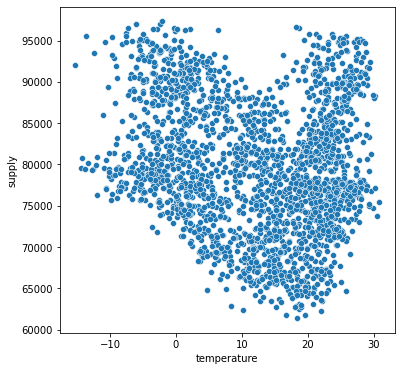

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

src_path = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python_da/energy_weather.csv'
df = pd.read_csv(src_path, sep=',')

print(df.head(3))


fig = plt.figure(figsize=(6,6))
ax = fig.gca()
sns.scatterplot('temperature', 'supply', data=df, ax=ax)
plt.show()


In [4]:
##분산분석(ANOVA)

import pandas as pd
import scipy as sp
import numpy as np
import pingouin as pg
import scikit_posthocs

import matplotlib.pyplot as plt
import seaborn as sns

src_path = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python_da/sns_usage_time.csv'
df = pd.read_csv(src_path, sep=',')
print(df.info())

#연령별 데이터 건수
print(df['age_grp'].value_counts())

#dataframe안의 그룹에 대해서 정렬해서 보여주기 위해 sorting 을 수행합니다.
df.sort_values(by=['age_grp'], inplace=True)

# Grouped boxplots by seaborn
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
sns.boxplot(x="age_grp", 
            y="use_time", 
            data=df, ax= ax)
plt.show()


#PANDAS LIB.의 결과가 소수점 셋째 자리까지 출력이 되도록 설정
pd.options.display.float_format='{:.3f}'.format

np_arr_type_1 = np.array(df.loc[df['age_grp']=='10 and under']['use_time'])
np_arr_type_2 = np.array(df.loc[df['age_grp']=='20']['use_time'])
np_arr_type_3 = np.array(df.loc[df['age_grp']=='30']['use_time'])
np_arr_type_4 = np.array(df.loc[df['age_grp']=='40']['use_time'])
np_arr_type_5 = np.array(df.loc[df['age_grp']=='50']['use_time'])
np_arr_type_6 = np.array(df.loc[df['age_grp']=='60 and over']['use_time'])

print(sp.stats.bartlett(
  np_arr_type_1,
  np_arr_type_2,
  np_arr_type_3,
  np_arr_type_4,
  np_arr_type_5,
  np_arr_type_6    
))

#분산분석 ANOVA
print(pg.anova(dv='use_time', between='age_grp', data=df))

#사후분석
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data = df['use_time'], groups = df['age_grp'])
print(mc.tukeyhsd())


ModuleNotFoundError: ignored

In [5]:
#선형회귀분석
import pandas as pd
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

src_path = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python_da/kaggle_boston_price.csv'
df = pd.read_csv(src_path, sep=',')

print(df.head(3))

#단순선형회귀분석 ************************************

model = smf.ols(formula='CMEDV~RM', data=df).fit()

print(model.summary())


#다중선형회귀분석 ************************************
import statsmodels.api as sm
import numpy as np

print(df.head(3))


#위도 경도 제거하기
df.drop(['LON', 'LAT', 'TOWN'], inplace=True, axis=1)

#표준화 수행
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
       'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df[cols] = (df[cols] - np.mean(df[cols], axis=0))/np.std(df[cols],axis=0)
print(df.head(3))


Y = df['CMEDV']
X = df[cols]

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

         TOWN     LON      LAT  CMEDV     CRIM    ZN  INDUS  CHAS    NOX  \
0      Nahant -70.955  42.2550   24.0  0.00632  18.0   2.31     0  0.538   
1  Swampscott -70.950  42.2875   21.6  0.02731   0.0   7.07     0  0.469   
2  Swampscott -70.936  42.2830   34.7  0.02729   0.0   7.07     0  0.469   

      RM   AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  
0  6.575  65.2  4.0900    1  296     15.3  396.90   4.98  
1  6.421  78.9  4.9671    2  242     17.8  396.90   9.14  
2  7.185  61.1  4.9671    2  242     17.8  392.83   4.03  
                            OLS Regression Results                            
Dep. Variable:                  CMEDV   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           1.31e-74
Time:                        15:31:58   Log-Likelihood:         

   Type  Length      Depth         Kg
0  tuna   55.46  13.240930   8.631268
1  tuna   72.07  17.671346  19.288996
2  tuna   62.84  15.635367  13.140561


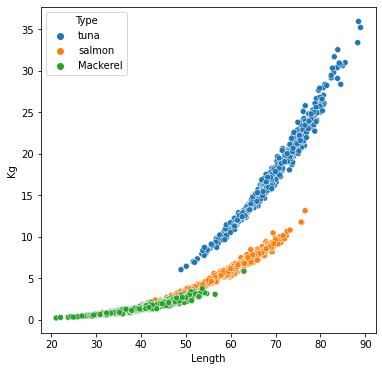

0    1000
1     500
Name: Target, dtype: int64
tuna        500
salmon      500
Mackerel    500
Name: Type, dtype: int64
Optimization terminated successfully.
         Current function value: 0.006457
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1496
Method:                           MLE   Df Model:                            3
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.9899
Time:                        15:51:06   Log-Likelihood:                -9.6856
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

In [6]:
#로지스틱 회귀분석
import pandas as pd
import statsmodels.api as sm
import numpy as np

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python_da/fish_train.csv')
print(df.head(3))


import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
sns.scatterplot(df['Length'], df['Kg'], hue=df['Type'], ax=ax)
plt.show()


#종속변수를 숫자형으로 변환합니다.
df['Target'] = np.where(df['Type'] == 'tuna', 1, 0)
print(df['Target'].value_counts())
print(df['Type'].value_counts())

#종속변수와 독립변수 구분 및 constant 추가
X = df[['Length', 'Depth', 'Kg']]
Y = df[['Target']]

X = sm.add_constant(X) #constant(intercept)
#로지스틱회귀분석 모델 학습
model = sm.Logit(Y,X).fit()

print(model.summary())



In [ ]:
#코드프레소 출처